In [1]:
# Lib's
import pandas
import numpy as np
import matplotlib.pyplot as plt

# Get data from csv
data = pandas.read_csv('exampleData.csv', sep=';', header=None)


In [2]:
# Get variables as lists
ctrlOutput      = data[1].tolist()
ctrlFeedback    = data[5].tolist()
t               = data[0].tolist() 

# Correct time resolution
for i in range(len(data.index)):
    t[i] = t[i] / 1000 


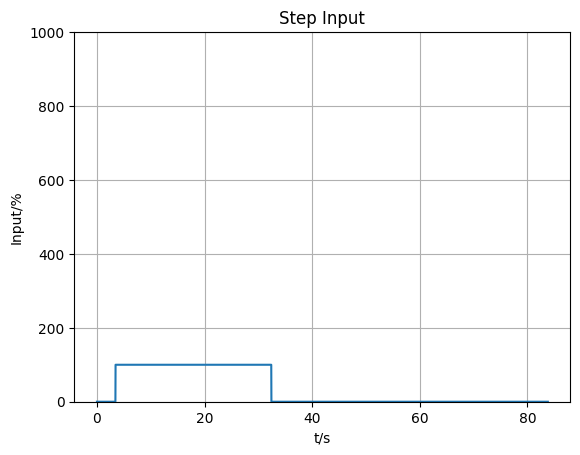

In [3]:
# Step plotten 
plt.grid()
plt.title('Step Input')
plt.xlabel('t/s')
plt.ylabel('Input/%')
plt.plot(t, ctrlOutput, label='Step input')
plt.ylim(0,120)
plt.savefig('figure/01step.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()


NameError: name 'primVorlauf' is not defined

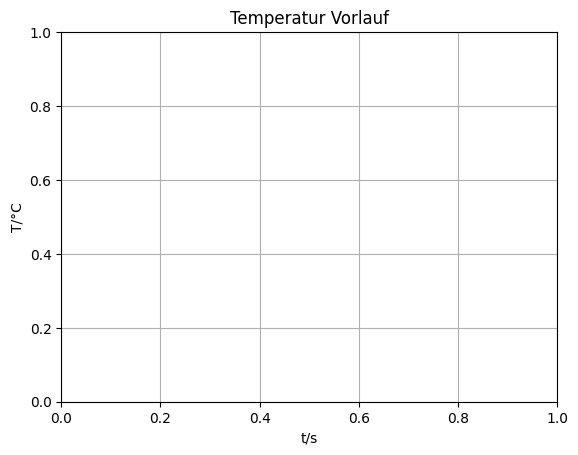

In [4]:
# Vorlauftemperatur plotten
plt.grid()
plt.title('Temperatur Vorlauf')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(t, primVorlauf, label='Temperatur Vorlauf')
plt.legend(loc = "upper left") 
plt.ylim(0, 20)
plt.savefig('02primVorlauf.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()


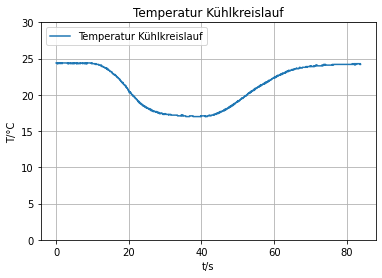

In [ ]:
# Vorlauftemperatur Kühlkreislauf plotten
plt.grid()
plt.title('Temperatur Kühlkreislauf')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(t, secVorlauf, label='Temperatur Kühlkreislauf')
plt.legend(loc = "upper left") 
plt.ylim(0,30)
plt.savefig('03secVorlauf.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()


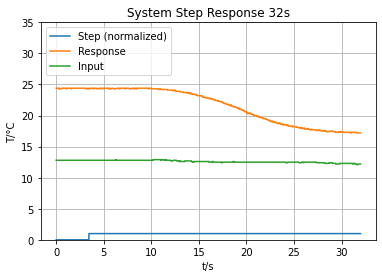

In [ ]:
# Find step response - Daten der ersten 32 Sekunden betrachten
# Ts = 10ms -> 3200 Datenpunkte = 32 Sekunden
n32 = 3200 
# Lists mit der passende Größe deklarieren
stepNorm32  = [None]*n32
response32  = [None]*n32
input32     = [None]*n32
time32      = [None]*n32
# Lists mit den Werten beschreiben und step normieren
for i in range(0,n32,1):
    stepNorm32[i] = ctrlOutput[i] / 100
    response32[i] = secVorlauf[i]
    input32[i]    = primVorlauf[i]
    time32[i]     = t[i]
# Systemantwort in den ersten 32 Sekunden plotten
plt.grid()
plt.title('System Step Response 32s')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(time32, stepNorm32, label='Step (normalized)')
plt.plot(time32, response32, label='Response')
plt.plot(time32, input32, label='Input')
plt.legend(loc = "upper left") 
plt.ylim(0,35)
plt.savefig('04systemStepResponse.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()


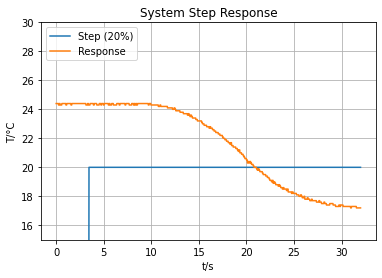

In [ ]:
# Den wichtigen Ausschnitt noch einmal untersuchen
# Als Übesicht den Step bei 20% (1/5) anzeigen
step5 = [None]*n32
for i in range(0,n32,1):
    step5[i] = ctrlOutput[i] / 5

plt.grid()
plt.title('System Step Response')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(time32, step5, label='Step (20%)')
plt.plot(time32, response32, label='Response')
plt.legend(loc = "upper left") 
plt.ylim(15,30)
plt.savefig('05systemStepResponseCustomized.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()


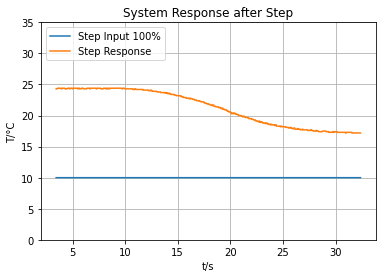

In [ ]:
# Jetzt nur noch ab dem Sprung (t=3.44s bis t=32.39s) betrachten
# Wertebereich: 3239 - 344 = 2895 (~29s)
n29 = 2895
# Listen mit der passende Größe deklarieren
stepInput29       = [None]*n29
stepResponse29    = [None]*n29
stepTime29        = [None]*n29
# Listen mit den Werten beschreiben, step normieren
for i in range(344,3239,1):
    stepInput29       [i - 344]   = ctrlOutput[i] / 10
    stepResponse29    [i - 344]   = secVorlauf[i]
    stepTime29        [i - 344]   = t[i]
# Systemantwort plotten
plt.grid()
plt.title('System Response after Step')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(stepTime29, stepInput29, label='Step Input 100%')
plt.plot(stepTime29, stepResponse29, label='Step Response')
plt.legend(loc = "upper left") 
plt.ylim(0,35)
plt.savefig('06systemResponseAfterStep.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()

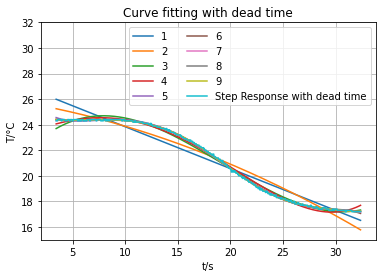

In [ ]:
# Do the curve fitting with numpy
# Model bis zur 9. Ordnung erstellen
model = [None]*10
for i in range(1,10,1):
    model[i] = np.poly1d(np.polyfit(stepTime29, stepResponse29, i))
    # Plotten der Annäherungen 
    plt.plot(stepTime29, model[i](stepTime29), label=i)

plt.grid()
plt.title('Curve fitting with dead time')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(stepTime29, stepResponse29, label='Step Response with dead time')
plt.legend(loc = "upper right",ncol=2) 
plt.ylim(15,32)
plt.savefig('07curveFittingWithDeadTime.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()


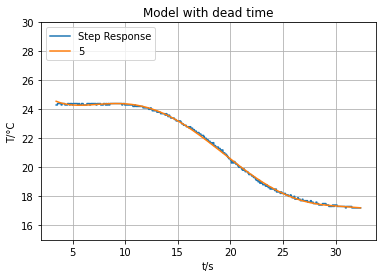

            5             4           3          2
-6.159e-06 x + 0.0005879 x - 0.01965 x + 0.2662 x - 1.521 x + 27.36


In [ ]:
# Model mit Ordnung erstellen
order = 5
# Plotten
plt.grid()
plt.title('Model with dead time')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(stepTime29, stepResponse29, label='Step Response')
plt.plot(stepTime29, model[order](stepTime29), label=order)
plt.legend(loc = "upper left") 
plt.ylim(15,30)
plt.savefig('08modelWithDeadTime.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()

# Modelbeschreibung ausgeben
print(model[order])


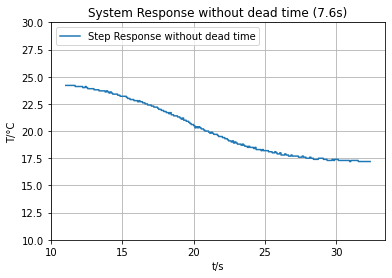

In [ ]:
# Jetzt noch ohne Zeitverzögerung (~7.6s) betrachten 
# 1103 - 344 = 759ms
n = 2136
# Listen mit der passende Größe deklarieren
stepResponseWithoutDeadTime    = [None]*n
stepTimeWithoutDeadTime        = [None]*n
# Listen mit den Werten beschreiben
for i in range(1103,3239,1):
    stepResponseWithoutDeadTime    [i - 1103]   = secVorlauf[i]
    stepTimeWithoutDeadTime        [i - 1103]   = t[i]
# Systemantwort plotten
plt.grid()
plt.title('System Response without dead time (7.6s)')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(stepTimeWithoutDeadTime, stepResponseWithoutDeadTime, label='Step Response without dead time')
plt.legend(loc = "upper left") 
plt.ylim(10,30)
plt.savefig('09systemResponseWithoutDeadTime.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()


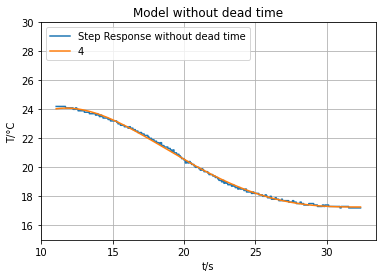

            4           3          2
-0.0001076 x + 0.01104 x - 0.3935 x + 5.37 x - 0.5318


In [ ]:
# Do the curve fitting with numpy AGAIN
# Model erstellen
orderWithoutDeadTime = 4
modelWithoutDeadTime = np.poly1d(np.polyfit(stepTimeWithoutDeadTime, stepResponseWithoutDeadTime, orderWithoutDeadTime))

# Plotten
plt.grid()
plt.title('Model without dead time')
plt.xlabel('t/s')
plt.ylabel('T/°C')
plt.plot(stepTimeWithoutDeadTime, stepResponseWithoutDeadTime, label='Step Response without dead time')
plt.plot(stepTimeWithoutDeadTime, modelWithoutDeadTime(stepTimeWithoutDeadTime), label=orderWithoutDeadTime)
plt.legend(loc = "upper left") 
plt.ylim(15,30)
plt.savefig('10modelWithoutDeadTime.jpg', format="jpg", dpi=1000, bbox_inches='tight')
plt.show()

# Modelbeschreibung ausgeben
print(modelWithoutDeadTime)